In [1]:
import pandas as pd
import numpy as np

# Read the csv data from the file "dataset/league_team.csv"
league_team = pd.read_csv("../dataset/league_team.csv")

# Drop rows with na
league_team = league_team.dropna()

league_team.head()



,no,game_no,korean_time,win,team_id,team_position,hour,time_of_the_day,team,top_blue,jungle_blue,middle_blue,bottom_blue,utility_blue,top_red,jungle_red,middle_red,bottom_red,utility_red
0,0,5997685929,2022-07-02T09:00:11Z,False,100,TOP,9,Morning,Blue,Ornn,Diana,Yasuo,Sivir,Ashe,Mordekaiser,LeeSin,Yone,Ziggs,Senna
1,1,5997685945,2022-07-02T09:00:24Z,False,100,TOP,9,Morning,Blue,Camille,Shyvana,Viktor,Ezreal,Seraphine,Darius,RekSai,Malzahar,Samira,Galio
2,2,5997685963,2022-07-02T09:00:21Z,False,100,TOP,9,Morning,Blue,Malphite,LeeSin,Zoe,Aphelios,Gragas,Gangplank,Viego,Leblanc,Senna,Xerath
3,3,5997685964,2022-07-02T09:01:03Z,True,100,TOP,9,Morning,Blue,Vayne,Poppy,Yasuo,Kaisa,Nautilus,Renekton,Belveth,Sylas,Ezreal,Leblanc
4,4,5997685965,2022-07-02T09:00:02Z,False,100,TOP,9,Morning,Blue,Sejuani,Kayn,Ahri,Ezreal,Xerath,Volibear,LeeSin,Corki,Sivir,Thresh


In [2]:
# convert the last 10 columns values in league_team to lower case and remove ' if the value is a string
for col in league_team.columns[-10:]:
    league_team[col] = league_team[col].apply(lambda x: x.lower().replace("'", "") if type(x) == str else x)
league_team

,no,game_no,korean_time,win,team_id,team_position,hour,time_of_the_day,team,top_blue,jungle_blue,middle_blue,bottom_blue,utility_blue,top_red,jungle_red,middle_red,bottom_red,utility_red
0,0,5997685929,2022-07-02T09:00:11Z,False,100,TOP,9,Morning,Blue,ornn,diana,yasuo,sivir,ashe,mordekaiser,leesin,yone,ziggs,senna
1,1,5997685945,2022-07-02T09:00:24Z,False,100,TOP,9,Morning,Blue,camille,shyvana,viktor,ezreal,seraphine,darius,reksai,malzahar,samira,galio
2,2,5997685963,2022-07-02T09:00:21Z,False,100,TOP,9,Morning,Blue,malphite,leesin,zoe,aphelios,gragas,gangplank,viego,leblanc,senna,xerath
3,3,5997685964,2022-07-02T09:01:03Z,True,100,TOP,9,Morning,Blue,vayne,poppy,yasuo,kaisa,nautilus,renekton,belveth,sylas,ezreal,leblanc
4,4,5997685965,2022-07-02T09:00:02Z,False,100,TOP,9,Morning,Blue,sejuani,kayn,ahri,ezreal,xerath,volibear,leesin,corki,sivir,thresh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257026,258928,5999694597,2022-07-03T08:58:56Z,False,100,TOP,8,Morning,Blue,illaoi,nocturne,syndra,vayne,leona,irelia,leesin,yasuo,kalista,swain
257027,258929,5999694617,2022-07-03T08:59:21Z,False,100,TOP,8,Morning,Blue,aatrox,monkeyking,katarina,jinx,nami,lillia,kayn,galio,kaisa,yuumi
257028,258930,5999694627,2022-07-03T08:59:53Z,False,100,TOP,8,Morning,Blue,volibear,khazix,swain,samira,thresh,darius,viego,renekton,aphelios,xerath
257029,258931,5999694628,2022-07-03T08:59:18Z,False,100,TOP,8,Morning,Blue,malphite,kayn,rumble,kaisa,soraka,sylas,kindred,zed,ezreal,lux


In [3]:

# Read the csv data from the file "dataset/champions.csv" as champions
champions = pd.read_csv("../dataset/champions.csv")
champions.head()


,ID,Champion_Name,Primary_Role,Primary_Location,Health,Mana,Health_Regen,Mana_Regen,Attack_Demage,Armor,Magic_Resistance,Attack_Speed,Movement_Speed,Range,Tier
0,0,Aatrox,Fighter,Top,650,0,3.0,0,60,38,32,65,345,175,4
1,1,Ahri,Mage,Mid,570,418,2.0,8,53,18,30,66,330,550,4
2,2,Akali,Assassin,Mid,570,200,9.0,0,62,23,37,62,345,125,7
3,3,Akshan,Marksman,Mid,630,350,4.0,7,52,26,30,63,330,500,5
4,4,Alistar,Tank,Support,670,350,8.0,8,62,44,32,62,330,125,3


In [4]:

# lower capitalization of the column names
champions.columns = champions.columns.str.lower()

# convert champion_name column to lower case and remove spaces and symbols in every row
champions["champion_name"] = champions["champion_name"].str.lower().str.replace(" ", "").str.replace("'", "").str.replace(".", "")

# change value "wukong" to "monkeyking" and "nunuwillump" to "nunu" in the column "champion_name"
champions["champion_name"] = champions["champion_name"].replace("wukong", "monkeyking").replace("nunu&willump", "nunu").replace("renataglasc", "renata")

# display all the unique values in the column "champion_name"
champions["champion_name"].unique()


C:\Users\Fred\AppData\Local\Temp\ipykernel_2728\1145383634.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  champions["champion_name"] = champions["champion_name"].str.lower().str.replace(" ", "").str.replace("'", "").str.replace(".", "")


array(['aatrox', 'ahri', 'akali', 'akshan', 'alistar', 'amumu', 'anivia',
       'annie', 'aphelios', 'ashe', 'aurelionsol', 'azir', 'bard',
       'belveth', 'blitzcrank', 'brand', 'braum', 'caitlyn', 'camille',
       'cassiopeia', 'chogath', 'corki', 'darius', 'diana', 'drmundo',
       'draven', 'ekko', 'elise', 'evelynn', 'ezreal', 'fiddlesticks',
       'fiora', 'fizz', 'galio', 'gangplank', 'garen', 'gnar', 'gragas',
       'graves', 'gwen', 'hecarim', 'heimerdinger', 'illaoi', 'irelia',
       'ivern', 'janna', 'jarvaniv', 'jax', 'jayce', 'jhin', 'jinx',
       'kaisa', 'kalista', 'karma', 'karthus', 'kassadin', 'katarina',
       'kayle', 'kayn', 'kennen', 'khazix', 'kindred', 'kled', 'kogmaw',
       'leblanc', 'leesin', 'leona', 'lillia', 'lissandra', 'lucian',
       'lulu', 'lux', 'malphite', 'malzahar', 'maokai', 'masteryi',
       'missfortune', 'mordekaiser', 'morgana', 'nami', 'nasus',
       'nautilus', 'neeko', 'nidalee', 'nilah', 'nocturne', 'nunu',
       'olaf', '

In [5]:

# select the columns "champion_name" and "champion_id" from the dataframe champions and convert it to a dictionary
champions_dict = champions[["champion_name", "tier"]].set_index("champion_name").to_dict()["tier"]

# display the dictionary
champions_dict

{'aatrox': 4,
 'ahri': 4,
 'akali': 7,
 'akshan': 5,
 'alistar': 3,
 'amumu': 1,
 'anivia': 3,
 'annie': 4,
 'aphelios': 5,
 'ashe': 4,
 'aurelionsol': 5,
 'azir': 4,
 'bard': 4,
 'belveth': 3,
 'blitzcrank': 5,
 'brand': 5,
 'braum': 5,
 'caitlyn': 4,
 'camille': 3,
 'cassiopeia': 4,
 'chogath': 5,
 'corki': 5,
 'darius': 6,
 'diana': 2,
 'drmundo': 6,
 'draven': 5,
 'ekko': 2,
 'elise': 1,
 'evelynn': 2,
 'ezreal': 3,
 'fiddlesticks': 2,
 'fiora': 4,
 'fizz': 4,
 'galio': 5,
 'gangplank': 5,
 'garen': 7,
 'gnar': 5,
 'gragas': 2,
 'graves': 1,
 'gwen': 5,
 'hecarim': 3,
 'heimerdinger': 6,
 'illaoi': 6,
 'irelia': 2,
 'ivern': 4,
 'janna': 5,
 'jarvaniv': 3,
 'jax': 4,
 'jayce': 5,
 'jhin': 4,
 'jinx': 4,
 'kaisa': 3,
 'kalista': 4,
 'karma': 4,
 'karthus': 2,
 'kassadin': 5,
 'katarina': 6,
 'kayle': 5,
 'kayn': 2,
 'kennen': 6,
 'khazix': 2,
 'kindred': 2,
 'kled': 6,
 'kogmaw': 7,
 'leblanc': 5,
 'leesin': 1,
 'leona': 4,
 'lillia': 3,
 'lissandra': 6,
 'lucian': 6,
 'lulu': 5,
 '

In [6]:
# Put all unique values in the column "champion_name" in a set
champion_names = set(champions["champion_name"])

# Put all unique values across the last 10 columns in a set
team_names = set(league_team.iloc[:, -10:].values.flatten())

# compare the two sets and display the difference
print(champion_names.difference(team_names))
print(team_names.difference(champion_names))

{'nilah'}
set()


In [7]:
league_team

,no,game_no,korean_time,win,team_id,team_position,hour,time_of_the_day,team,top_blue,jungle_blue,middle_blue,bottom_blue,utility_blue,top_red,jungle_red,middle_red,bottom_red,utility_red
0,0,5997685929,2022-07-02T09:00:11Z,False,100,TOP,9,Morning,Blue,ornn,diana,yasuo,sivir,ashe,mordekaiser,leesin,yone,ziggs,senna
1,1,5997685945,2022-07-02T09:00:24Z,False,100,TOP,9,Morning,Blue,camille,shyvana,viktor,ezreal,seraphine,darius,reksai,malzahar,samira,galio
2,2,5997685963,2022-07-02T09:00:21Z,False,100,TOP,9,Morning,Blue,malphite,leesin,zoe,aphelios,gragas,gangplank,viego,leblanc,senna,xerath
3,3,5997685964,2022-07-02T09:01:03Z,True,100,TOP,9,Morning,Blue,vayne,poppy,yasuo,kaisa,nautilus,renekton,belveth,sylas,ezreal,leblanc
4,4,5997685965,2022-07-02T09:00:02Z,False,100,TOP,9,Morning,Blue,sejuani,kayn,ahri,ezreal,xerath,volibear,leesin,corki,sivir,thresh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257026,258928,5999694597,2022-07-03T08:58:56Z,False,100,TOP,8,Morning,Blue,illaoi,nocturne,syndra,vayne,leona,irelia,leesin,yasuo,kalista,swain
257027,258929,5999694617,2022-07-03T08:59:21Z,False,100,TOP,8,Morning,Blue,aatrox,monkeyking,katarina,jinx,nami,lillia,kayn,galio,kaisa,yuumi
257028,258930,5999694627,2022-07-03T08:59:53Z,False,100,TOP,8,Morning,Blue,volibear,khazix,swain,samira,thresh,darius,viego,renekton,aphelios,xerath
257029,258931,5999694628,2022-07-03T08:59:18Z,False,100,TOP,8,Morning,Blue,malphite,kayn,rumble,kaisa,soraka,sylas,kindred,zed,ezreal,lux


In [8]:
# match the last 10 columns in league_team with the values in champions_name column in champions and replace the values with the values in the dictionary champions_dict
# also convert to int

for col in league_team.columns[-10:]:
    league_team[col] = league_team[col].map(champions_dict)
    league_team[col] = league_team[col].astype(int)

    


# filter row with na
league_team

,no,game_no,korean_time,win,team_id,team_position,hour,time_of_the_day,team,top_blue,jungle_blue,middle_blue,bottom_blue,utility_blue,top_red,jungle_red,middle_red,bottom_red,utility_red
0,0,5997685929,2022-07-02T09:00:11Z,False,100,TOP,9,Morning,Blue,5,2,5,5,4,6,1,3,5,6
1,1,5997685945,2022-07-02T09:00:24Z,False,100,TOP,9,Morning,Blue,3,3,5,3,4,6,3,7,5,5
2,2,5997685963,2022-07-02T09:00:21Z,False,100,TOP,9,Morning,Blue,4,1,5,5,2,5,1,5,6,5
3,3,5997685964,2022-07-02T09:01:03Z,True,100,TOP,9,Morning,Blue,5,3,5,3,4,6,3,5,3,5
4,4,5997685965,2022-07-02T09:00:02Z,False,100,TOP,9,Morning,Blue,4,2,4,3,5,2,1,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257026,258928,5999694597,2022-07-03T08:58:56Z,False,100,TOP,8,Morning,Blue,6,2,4,5,4,2,1,5,4,4
257027,258929,5999694617,2022-07-03T08:59:21Z,False,100,TOP,8,Morning,Blue,4,1,6,4,5,3,2,5,3,5
257028,258930,5999694627,2022-07-03T08:59:53Z,False,100,TOP,8,Morning,Blue,2,2,4,5,3,6,1,6,5,5
257029,258931,5999694628,2022-07-03T08:59:18Z,False,100,TOP,8,Morning,Blue,4,2,6,3,4,5,2,4,3,6


In [9]:
# Drop rows containing na
league_team = league_team.dropna()



In [10]:
import tensorflow as tf


In [11]:
league_team

,no,game_no,korean_time,win,team_id,team_position,hour,time_of_the_day,team,top_blue,jungle_blue,middle_blue,bottom_blue,utility_blue,top_red,jungle_red,middle_red,bottom_red,utility_red
0,0,5997685929,2022-07-02T09:00:11Z,False,100,TOP,9,Morning,Blue,5,2,5,5,4,6,1,3,5,6
1,1,5997685945,2022-07-02T09:00:24Z,False,100,TOP,9,Morning,Blue,3,3,5,3,4,6,3,7,5,5
2,2,5997685963,2022-07-02T09:00:21Z,False,100,TOP,9,Morning,Blue,4,1,5,5,2,5,1,5,6,5
3,3,5997685964,2022-07-02T09:01:03Z,True,100,TOP,9,Morning,Blue,5,3,5,3,4,6,3,5,3,5
4,4,5997685965,2022-07-02T09:00:02Z,False,100,TOP,9,Morning,Blue,4,2,4,3,5,2,1,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257026,258928,5999694597,2022-07-03T08:58:56Z,False,100,TOP,8,Morning,Blue,6,2,4,5,4,2,1,5,4,4
257027,258929,5999694617,2022-07-03T08:59:21Z,False,100,TOP,8,Morning,Blue,4,1,6,4,5,3,2,5,3,5
257028,258930,5999694627,2022-07-03T08:59:53Z,False,100,TOP,8,Morning,Blue,2,2,4,5,3,6,1,6,5,5
257029,258931,5999694628,2022-07-03T08:59:18Z,False,100,TOP,8,Morning,Blue,4,2,6,3,4,5,2,4,3,6


In [12]:
def vectorize_sequences(sequences, dimension=162):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
def vectorize_sequences(sequences, dimension=162, level = 10):
    results = np.zeros((len(sequences), dimension*level))
    for i, sequence in enumerate(sequences):
        for j, num in enumerate(sequence):
            results[i, j*dimension+num] = 1
    return results

In [13]:
vectorize_sequences([[1,2,3], [9,8,7]], 10, level = 7)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [14]:
from sklearn.model_selection import train_test_split
#split the data into train and test set with stratify
train, test = train_test_split(league_team, test_size=0.2, stratify=league_team["win"])

y_train = train['win']

y_test = test['win']

# select the "top_blue" and "top_red" two columns from train and test and convert them to numpy array
# x_train = train[['top_blue', 'top_red']].to_numpy()
# x_test = test[['top_blue', 'top_red']].to_numpy()


x_train = train.iloc[:, -10:].to_numpy()
x_test = test.iloc[:, -10:].to_numpy()


from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

level = 7
# remove x_train and x_test header
print(y_train[0])
print(x_train[0])
x_train = vectorize_sequences(x_train, dimension=162*7, level = 10)
x_test = vectorize_sequences(x_test, dimension=162*7, level = 10)
x_train[0]

[0. 1.]
[2 4 6 3 6 3 1 5 3 4]


array([0., 0., 1., ..., 0., 0., 0.])

In [16]:
number_of_champions = 162

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(number_of_champions*level*10,), kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer=keras.optimizers.RMSprop(1e-2),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(x_train,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1)

Epoch 1/5


ValueError: in user code:

    File "d:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "d:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "d:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "d:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 1134), found shape=(None, 11340)


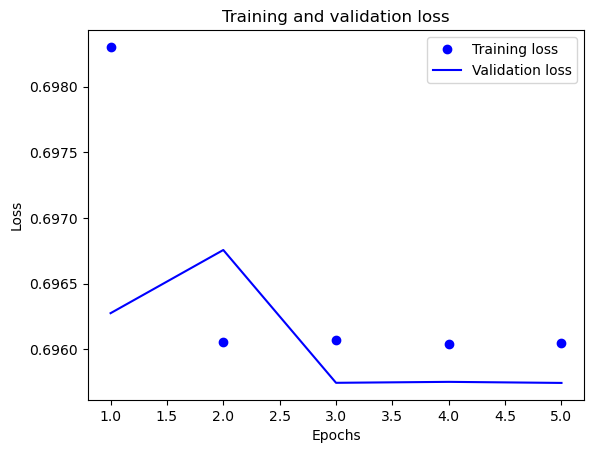

In [214]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()